# 1. Business Understanding

The key for this notebook is to dig into the airbnb dataset and find out find out what element or matrixs effect the price of the listing accorss the two city, then maybe come out with some suggest for new host. We will dig into more detail by answer those 3 business question below:

1. Investiagte into highest and lowest price tag of listing in two city
2. what elements are most important for price
3. Find the correlation between price and customer_satification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP
import seaborn as sns
import math
import time

pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

boston_calendar = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\calendar.csv')
boston_listing = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\listings.csv')
boston_reviews = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\reviews.csv')
seattle_calendar = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\calendar.csv')
seattle_listing = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\listings.csv')
seattle_reviews = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\reviews.csv')

# 2. Data Understanding

- calendar.csv contians data for the whether the date is available for book and how much it wil cost
- listing.csv contains many detailed data for each lsiting Id
- review.csv contains reviews for each host by who and the date it was maded

In [2]:
boston_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [3]:
seattle_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [4]:
boston_listing.select_dtypes(include=['object']).describe()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3585,3442,2528,3585,3585,2170,1610,2295,2096,2031,2393,2986,2986,3585,2986,3585,3585,3585,3574,2276,3114,3114,3114,3585,3585,3585,3246,3585,3585,3585,3585,3042,3585,3583,3585,3547,3571,3585,3585,3585,3585,3582,3585,3585,3585,3585,892,888,1342,2478,3585,3585,3585,2829,2829,3585,3585,3585,3585,3585
unique,3585,1,3504,3113,2268,3423,1,1728,1269,1859,1762,1617,1928,2986,2986,3585,2986,2181,1334,1281,176,1240,4,52,72,2,2174,2174,53,83,2,2,1239,30,25,38,1,43,4,39,1,1,2,13,3,5,3092,324,243,288,54,79,51,38,1,975,404,1,2,4,2,2
top,https://www.airbnb.com/rooms/12147973,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,"The unit is stylishly designed for comfort, va...",none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...","You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Allston-Brighton,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Allston-Brighton,Jamaica Plain,Boston,MA,02116,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,{},$150.00,"$1,000.00","$3,500.00",$100.00,$100.00,$0.00,today,2016-09-06,2016-04-05,2016-09-05,f,f,strict,f,f
freq,1,3585,8,21,17,7,3585,21,44,26,48,58,44,1,1,1,1,136,138,137,2421,79,1384,2072,1210,3178,136,136,375,930,3577,2603,64,364,343,3381,3585,388,3568,3381,3585,3585,3080,2612,2127,3453,32,144,48,30,299,353,2211,833,3585,23,118,3585,2991,1582,3518,3348


In [5]:
seattle_listing.select_dtypes(include=['object']).describe()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3818,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818,3817,3818,3818,3818,3818,2009,1517,1866,2788,3818,3818,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,116,2,2,1442,81,87,17,7,2,28,1,7,1,1,2,16,3,5,3284,273,395,356,46,118,45,34,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/241032,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a1.muscache.com/ac/pictures/67560560/c...,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,{},$150.00,$500.00,"$2,500.00",$100.00,$50.00,$0.00,today,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,1,1,1,1,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818,3818,3412,1733,2541,3657,45,162,94,66,348,310,2048,706,3818,3818,25,94,3818,3818,3227,1417,3497,3443


Text(0.5, 1.0, 'listing NaN - boston')

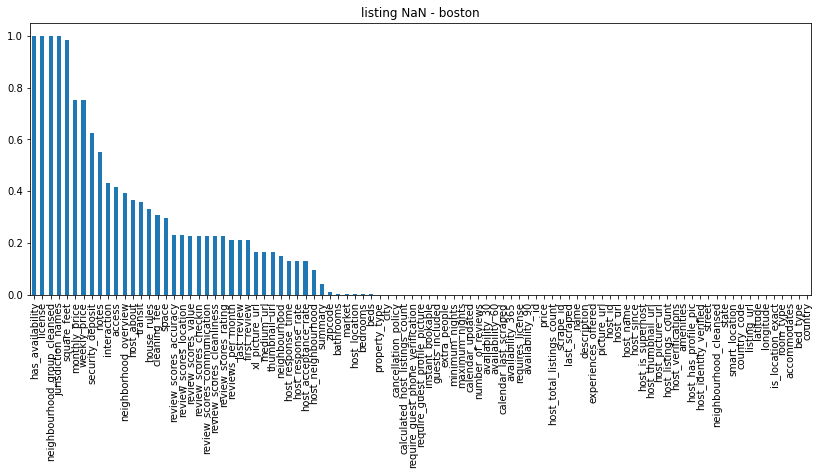

In [6]:
plt.figure(figsize=(14,5))


boston_listing.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('listing NaN - boston')

Text(0.5, 1.0, 'Listing NaN Top 10 - boston')

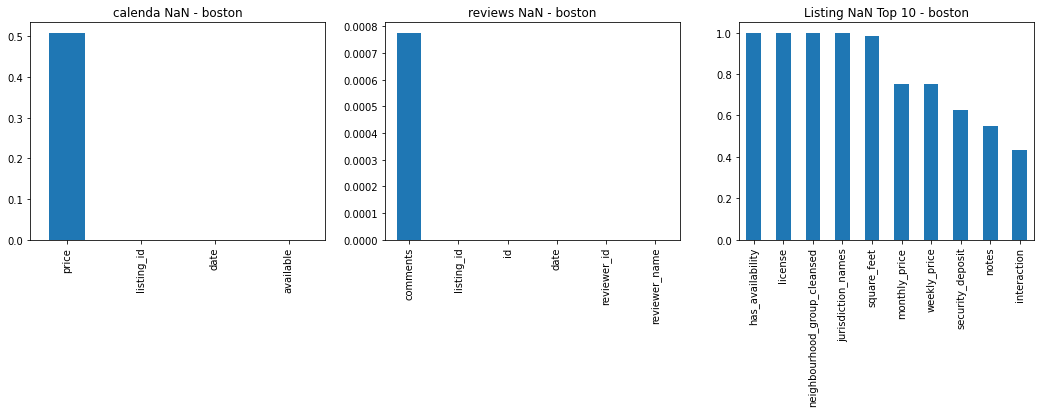

In [7]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
boston_calendar.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('calenda NaN - boston')

plt.subplot(1,3,2)
boston_reviews.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('reviews NaN - boston')

plt.subplot(1,3,3)
boston_listing.isnull().mean().sort_values(ascending=False)[:10].plot(kind = 'bar')
plt.title('Listing NaN Top 10 - boston')

Text(0.5, 1.0, 'listing NaN - seattle')

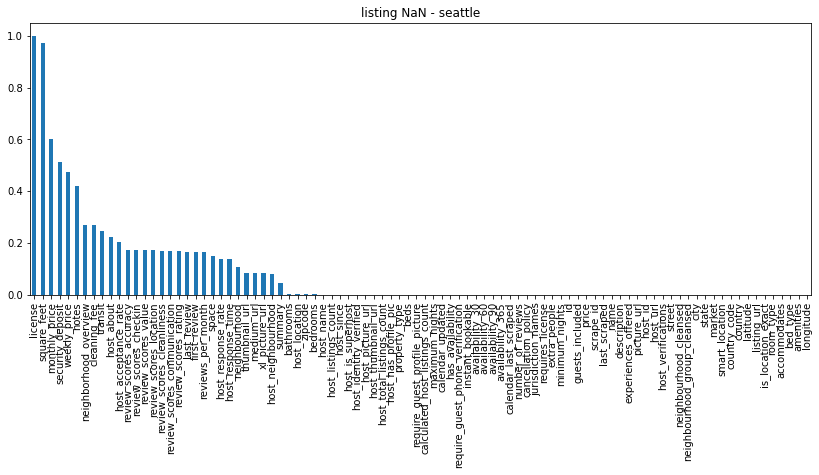

In [8]:
plt.figure(figsize=(14,5))


seattle_listing.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('listing NaN - seattle')

Text(0.5, 1.0, 'Listing NaN Top 10 - seattle')

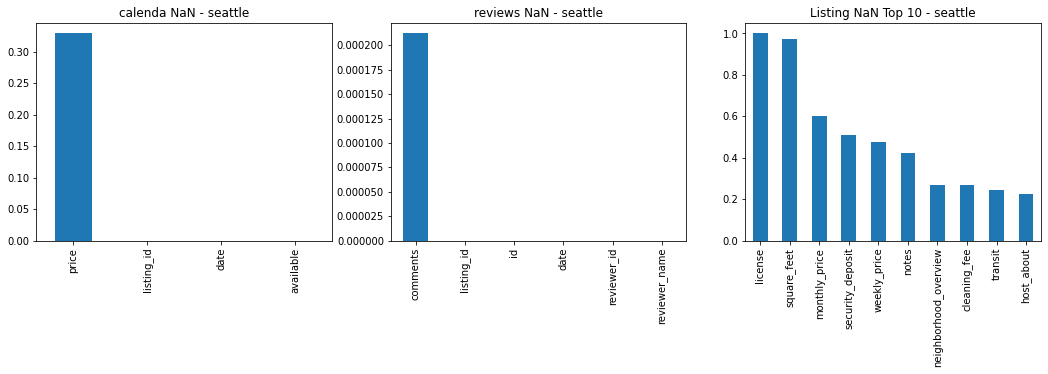

In [9]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
seattle_calendar.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('calenda NaN - seattle')

plt.subplot(1,3,2)
seattle_reviews.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('reviews NaN - seattle')

plt.subplot(1,3,3)
seattle_listing.isnull().mean().sort_values(ascending=False)[:10].plot(kind = 'bar')
plt.title('Listing NaN Top 10 - seattle')

# 3. Data Preparation/ Data Wrangling

- make all objet to number
- create new col for analysis
- change categorig data to dummy

In [10]:
# here are some function for data cleaning
def clean(df):
    # define some function for cleaning use
    def to_number(x):
        if type(x) == str:
            x = float(x.replace('$', '').replace('%', '').replace(',', ''))
        else:
            x = 0
        return x

    # drop useless cols
    urls = []
    for col in df.columns:
        words = col.split('_')
        if 'url' in words:
            urls.append(col)       
    
    useless = ['scrape_id','host_location','street','neighbourhood','neighbourhood_group_cleansed',
               'smart_location','country_code','country','calendar_last_scraped','last_scraped',
               'weekly_price','monthly_price','host_listings_count','availability_30','availability_60',
               'availability_90','availability_365','license','square_feet','calendar_updated']
    df = df.drop(columns=useless + urls,
                              axis=1)

    # convert host_since  to host_since_year
    df['host_since'] = df['host_since'].fillna('0')
    df['host_since_year'] = df['host_since'].apply(lambda x: int(x.split('-')[0]))
    df = df.drop(columns='host_since',
                 axis=1)

    # fix number column and make use all the number columns are number
    number_col = ['host_response_rate','host_acceptance_rate','host_total_listings_count',
                  'accommodates','bathrooms','bedrooms','beds','price','security_deposit',
                  'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights',
                  'number_of_reviews','review_scores_rating','review_scores_accuracy',
                  'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                  'review_scores_location','review_scores_value','calculated_host_listings_count',
                  'reviews_per_month','host_since_year']
    number_fix_col = []
    for col in number_col:
        if df[col].dtypes == object:
            number_fix_col.append(col)
    for col in number_fix_col:
        df[col] = df[col].apply(lambda x: to_number(x))
    # fill NaN with mean
    for col in number_col:
        df[col] = df[col].fillna(value = df[col].mean())
    
    # fix beds and bedrooms columns, they can't 1.5 beds or 1.5 bedrooms
    df['beds'] = df['beds'].apply(lambda x: float(Decimal(x).quantize(Decimal('1'),rounding=ROUND_HALF_UP)))
    df['bedrooms'] = df['bedrooms'].apply(lambda x: float(Decimal(x).quantize(Decimal('1'),rounding=ROUND_HALF_UP)))

    # create a new call customer_satisfication_matrix to measure customer satisfication
    df['satisfication_matrix(Max = 7)'] = df['review_scores_rating']/100 + df['review_scores_cleanliness']/10\
                                        + df['review_scores_checkin']/10 + df['review_scores_communication']/10\
                                        + df['review_scores_location']/10 + df['review_scores_value']/10\
                                        + df['review_scores_accuracy']/10
    df = df.drop(columns = ['review_scores_rating','review_scores_accuracy',
                            'review_scores_cleanliness','review_scores_checkin',
                            'review_scores_communication',
                            'review_scores_location','review_scores_value'],
                 axis = 1)

    return df

def to_dummy(df):
    def get_list(x):
        list = []
        for method in x.split(','):
            method = method.replace("['", '').replace("']", '').replace('{', '').replace('}', '').replace('"', '').replace("'","")
            list.append(method)

        return list

    def get_dummy(df,col):
        column = []
        for methods in df[col].unique():
            methods = methods.split(',')
            for method in methods:
                method = method.replace("['", '').replace("']", '').replace('{', '').replace('}', '').replace('"','').replace("'","")
                if method not in column:
                    column.append(method)

        print(column)
        print(len(column))

        # create new cols store dummy variable
        for c in column:
            df[c] = 0

        # change 'host_verifications' col to right list format
        df[col] = df[col].apply(lambda x: get_list(x))

        # sign value for each dummy col
        row = 0
        fin = 1
        start = time.time()
        for val_list in df[col].values:
            for val in val_list:
                df[val].iloc[row] = 1
            row += 1
            if row % 1000 == 0:
                print('finish {}, time = {}'.format(fin, time.time() - start))
                fin += 1

        # rename all the col with right name and drop 'host_verifications'
        # create rename list to store all the right name
        rename = []
        for name in column:
            name = col + '_' + name
            rename.append(name)
        # create rename dict to store right pair of old name and new name
        rename_dict = {}
        for val in zip(column, rename):
            rename_dict[val[0]] = val[1]
        df = df.rename(columns=rename_dict)
        # drop
        df = df.drop(columns = col,
                        axis = 1)

        return df

    # since words and long sentence are quite different compare with object and number
    # split data into available, available_words and not-available, not-available_words
    words_cols = ['name', 'summary', 'space', 'description', 'neighborhood_overview',
                  'notes', 'transit', 'host_about','market','first_review','last_review',
                  'host_name','location','interaction','experiences_offered',
                  'access','interaction','zipcode','house_rules']
    for col in words_cols:
        try:
            df = df.drop(columns = col,
                 axis = 1)
        except:
            print('column: {} not find for this dataframe'.format(col))
            

    # change amenities and host_verification to dummy value
    dummny_cols = ['host_verifications','amenities']
    for col in dummny_cols:
        df = get_dummy(df,col)

    # change the rest to dummy
    dummy_col = ['host_response_time', 'room_type', 'property_type', 'neighbourhood_cleansed',
                 'city', 'state', 'bed_type', 'jurisdiction_names', 'host_neighbourhood',
                 'cancellation_policy', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                 'is_location_exact', 'has_availability', 'requires_license', 'instant_bookable',
                 'require_guest_profile_picture', 'require_guest_phone_verification']
    df = pd.concat([df.drop(dummy_col, axis=1),
                    pd.get_dummies(df[dummy_col])], axis=1)
    return df

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'boston vs seattle listing price')

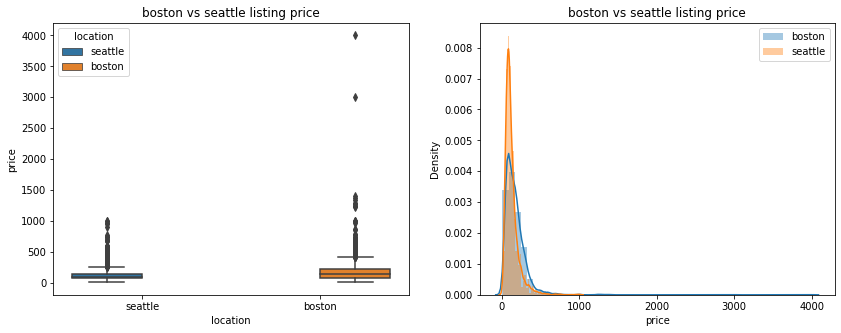

In [11]:
seattle = clean(seattle_listing)
boston = clean(boston_listing)

# check the distrubtion of price for both city to see if there is any we need to drop
boston['location'] = 'boston'
seattle['location'] = 'seattle'
price = pd.concat([seattle,boston])[['price','location']]

# price the plot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(data = price,
            x = 'location',
            y = 'price',
            hue = 'location')
plt.title('boston vs seattle listing price')

plt.subplot(1,2,2)
sns.distplot(boston.price,
             label='boston')
sns.distplot(seattle.price,
             label = 'seattle')
plt.legend()
plt.title('boston vs seattle listing price')

we see some extra outlier or very high price in hosuing list

In [12]:
# we will remove those outliers listing because are somehow hard to duplicate.
def clean_outlier(df):
    max = df.price.mean() + 3 * df.price.std()
    min = df.price.mean() - 3 * df.price.std()
    outiler = df[(df.price > max) | (df.price < min)]
    interlier = df[(df.price < max) & (df.price > min)]

    return outiler,interlier

boston_outer,boston_inter = clean_outlier(boston)
seattle_outer,seattle_inter = clean_outlier(seattle)

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'boston vs seattle listing price')

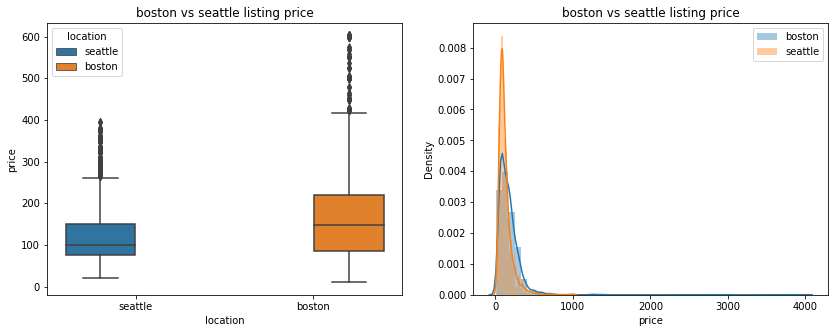

In [13]:
price = pd.concat([seattle_inter,boston_inter])[['price','location']]

# price the plot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(data = price,
            x = 'location',
            y = 'price',
            hue = 'location')
plt.title('boston vs seattle listing price')

plt.subplot(1,2,2)
sns.distplot(boston.price,
             label='boston')
sns.distplot(seattle.price,
             label = 'seattle')
plt.legend()
plt.title('boston vs seattle listing price')

there are still outliers in the dataset but look much more better

# 4. Analysis

### Part 1 Investiagte into highest and lowest price tag of listing in two city

For data including outlier
- 1 what are the highest and lowest price listing on boston and seattle?
- 1.2 what the host describe the place?
- 1.3 what the customer say about this place?

In [14]:
pd.set_option("display.max_colwidth", -1)

def high_low(df,df_review):
    look_at_col = ['id','name','description','price']

    high = df[df.price == df.price.max()][look_at_col]
    high['comment'] = df_review[df_review.listing_id == high.id.values[0]]['comments']
    for row in high.index:
        high = high.rename(index = {row: df.location.values[0] + '_' + 'high'})


    low = df[df.price == df.price.min()][look_at_col]
    low = low.rename(index = {low.index[0]: df.location.values[0] + '_' + 'low'})
    for row in low.index:
        low = low.rename(index = {row: df.location.values[0] + '_' + 'low'})

    df = pd.concat([high,low])

    return df

high_low_boston = high_low(boston,boston_reviews)
high_low_seattle =  high_low(seattle,seattle_reviews)

C:\Users\86130\AppData\Local\Temp/ipykernel_12428/3706669245.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [15]:
high_low_boston.T

,boston_high,boston_low
id,12972378,13926201
name,Fenway Park/Kenmore Square Flat,MIT ROOM
description,"Central Heat/AC, cable/internet, electricity, and hot water included. Fully furnished one bedroom apt. with sofa bed in living room. Kenmore Sq train/bus station less than a minute away Located at 534 Commonwealth Ave. Nearby Eastern Standard bar and restaurant, Fenway Park, House of Blues, Boston University, Lansdowne st, Longwood Medical area Hospitals, etc. Very convenient during all seasons. Right in the middle of the city. Practicality, functionality, location, comfort Kenmore Square/Fenway Park, Boston, Massachusetts Kenmore Square Green line train & bus station Super Strict 30 Days: 50% refund up until 30 days prior to arrival, except fees Note: The Super Strict cancellation policy applies to special circumstances and is by invitation only. Cleaning fees are always refunded if the guest did not check in. The Airbnb service fee is non-refundable. If there is a complaint from either party, notice must be given to Airbnb within 24 hours of check-in. Airbnb will mediate when neces","My place is close to Faneuil Hall Marketplace, Freedom Trail, Tip Tap Room, and Faneuil Hall. My place is good for couples."
price,4000.0,10.0
comment,NaN,NaN


In [16]:
high_low_seattle.T

,seattle_high,seattle_low
id,4825073,10310373
name,Cute Basement Apartment,"Cozy, cute, Queen Anne living"
description,2 bedroom fully finished basement apartment with separate entrance.,"I moved into my apartment in December. It's still very simple right now (no wifi or tv) but I have a patio, a back yard and I'm a 3 minute walk from public transportation, a Whole Foods, and a 5 minute bus ride to the Space Needle/downtown Seattle."
price,1000.0,20.0
comment,NaN,NaN


For data excluding outlier
- 1 what are the highest and lowest price listing on boston and seattle?
- 1.2 what the host describe the place?
- 1.3 what the customer say about this place?

In [17]:
high_low_boston_inter = high_low(boston_inter,boston_reviews)
high_low_seattle_inter =  high_low(seattle_inter,seattle_reviews)

In [18]:
high_low_boston_inter.T

,boston_high,boston_high,boston_high,boston_high,boston_low
id,6444138,2214923,6598203,7982359,13926201
name,Lux 2 BR in the Heart of Fenway,Lux 2 BR in the Heart of Fenway,Lux 2BR Apt Near Seaport w/WiFi,Lux 2BR Apt Near Seaport w/WiFi,MIT ROOM
description,"Located in the heart of Fenway, this luxury 15 story high-rise building features great on-site amenities such as rooftop swimming pool, club room, fitness center and spectacular views of Boston, the Charles River, and the Emerald Necklace. Inside our lavish apartment, you will find environmentally sustainable bamboo flooring, ceramic tile flooring, gourmet kitchen with granite counter tops and stainless steel appliances, European-style cabinetry, floor-to-ceiling windows, individually controlled heat and air conditioning, and walk-in closets. Your fully appointed apartment offers spacious accommodations with all the comforts of home including linens and towels, in unit washer/dryer, a dishwasher, fully equipped kitchen, and high speed internet access. Property amenities include: • Rooftop deck saltwater pool (open seasonally in summer) and lounge • Club house • Green roof garden • Fitness center • Business center • WiFi access in common areas • In unit washer/dryer The private maste","In the heart of Fenway, this lux high-rise building features great on-site amenities such as rooftop swimming pool (open seasonally in summer), club room, fitness center and spectacular views of Boston, the Charles River, and the Emerald Necklace. Residents will enjoy their luxurious spacious apartments equipped with superior features including European-style cabinetry, floor-to-ceiling windows, environmentally sustainable bamboo flooring, ceramic tile flooring, large tubs with high efficiency shower sprayer, stainless steel mirror and fixtures, stainless steel appliances, granite counter tops, in-unit high efficiency vent-less washer/dryer and individually controlled heating and air conditioning. Property amenities include: • 24-hour Fitness Center • Wi-Fi access in common areas • On-site Zip Car location • Club Room • Rooftop deck pool and lounge • Dry cleaning pick-up and drop-off service • Green roof garden The private master bedroom with en-suite bathroom features a deluxe queen","When reserving our luxury apartment, the city and the seaport are at your feet! This 21 floor High-Rise building offers a variety of fabulous amenities including an on-site restaurant and deli, computer lounge, 2 roof deck terraces & fitness center This spectacular apartment features a beautiful kitchen with granite counter tops, generous closet space, floor to ceiling windows providing unencumbered views of the harbor or the city skyline, central heat and air conditioning, an in-unit washer/dryer, as well as wood grain solid surface floors. Your fully appointed apartment is furnished with all the necessities of home, including linens and towels. Property amenities include: • 24-hour, full-service concierge • Two roof deck terraces • 24 hour state-of-the-art fitness center • Residential club and conference rooms • Business center with free WiFi • Common areas equipped with flat screen TV and full kitchen • On-site restaurants including Salvatore’s, Sal’s Pizza, and Legal Test Kitchen","When reserving our luxury apartment, the city and the seaport are at your feet! This 21 floor High-Rise building offers a variety of fabulous amenities including an on-site restaurant and deli, computer lounge, 2 roof deck terraces & fitness center This spectacular apartment features a beautiful kitchen with granite counter tops, generous closet space, floor to ceiling windows providing unencumbered views of the harbor or the city skyline, central heat and air conditioning, an in-unit washer/dryer, as well as wood grain solid surface floors. Your fully appointed apartment is furnished with all the necessities of home, including linens and towels. Property amenities include: • 24-hour, full-service concierge • Two roof deck terrac

In [19]:
high_low_seattle_inter.T

,seattle_high,seattle_high,seattle_low
id,108468,8257837,10310373
name,"Magazine Profiled, View, Gorgeous",In-City PH 180º Unobstructed Views,"Cozy, cute, Queen Anne living"
description,"We set out to create a one-of-a-kind home and succeeded. The architecture is modern, yet warm, industrial, yet slightly Asian. It has many influences that are Pacific Northwest but it is worldly in its style. The home is spacious, nearly 3000 square. We set out to create a one-of-a-kind home and succeeded. The architecture is modern, yet warm, industrial, yet slightly Asian. It has many influences that are Pacific Northwest but it is worldly in its style. The home is spacious, nearly 3000 square feet and there is plenty of space to be together or have quiet to yourself. Two of the three bathrooms are very large, one with slate shower and jetted tub and a view of the bay. It is wired for music and Wi-Fi. The home is located on the coveted southwest side of Queen Anne hill. Not only is this home an amazing place to relax or entertain, but it has two full office spaces and is fantastic for working while you are here. It is set with cabinets, desks, great lighting and tons of space. The",Walk/Bike to (SENSITIVE CONTENTS HIDDEN)/Microsoft/Gates Foundation/Amazon/U. of W. S.C.C.A.,"I moved into my apartment in December. It's still very simple right now (no wifi or tv) but I have a patio, a back yard and I'm a 3 minute walk from public transportation, a Whole Foods, and a 5 minute bus ride to the Space Needle/downtown Seattle."
price,395.0,395.0,20.0
comment,NaN,NaN,NaN


### Part 2 what elements are most important for price

- 1 what elements have the high positive impact on price?
- 1.2 what about negative impace elements?

In [20]:
boston_dummy = to_dummy(boston_inter)
seattle_dummy = to_dummy(seattle_inter)

column: interaction not find for this dataframe
['email', ' phone', ' facebook', ' reviews', ' linkedin', ' amex', ' jumio', ' kba', ' manual_online', ' manual_offline', ' google', 'phone', ' sent_id', 'facebook', ' weibo', '[]']
16


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


finish 1, time = 0.8008720874786377
finish 2, time = 1.579010009765625
finish 3, time = 2.3181614875793457
['TV', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Pets live on this property', 'Dog(s)', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Laptop Friendly Workspace', 'Internet', 'Air Conditioning', 'Pets Allowed', 'Carbon Monoxide Detector', 'Lock on Bedroom Door', 'Hangers', 'Hair Dryer', 'Iron', 'Cable TV', 'First Aid Kit', 'Safety Card', 'translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50', 'Gym', 'Breakfast', 'Indoor Fireplace', 'Cat(s)', '24-Hour Check-in', 'Hot Tub', 'Buzzer/Wireless Intercom', 'Other pet(s)', 'Washer / Dryer', 'Smoking Allowed', '', 'Suitable for Events', 'Wheelchair Accessible', 'Elevator in Building', 'Pool', 'Doorman', 'Paid Parking Off Premises', 'Free Parking on Street']
46
finish 1, time = 3.696889638900757
finish 2, time = 7.24

Text(0.5, 1.0, 'All element toward Price - boston area')

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 

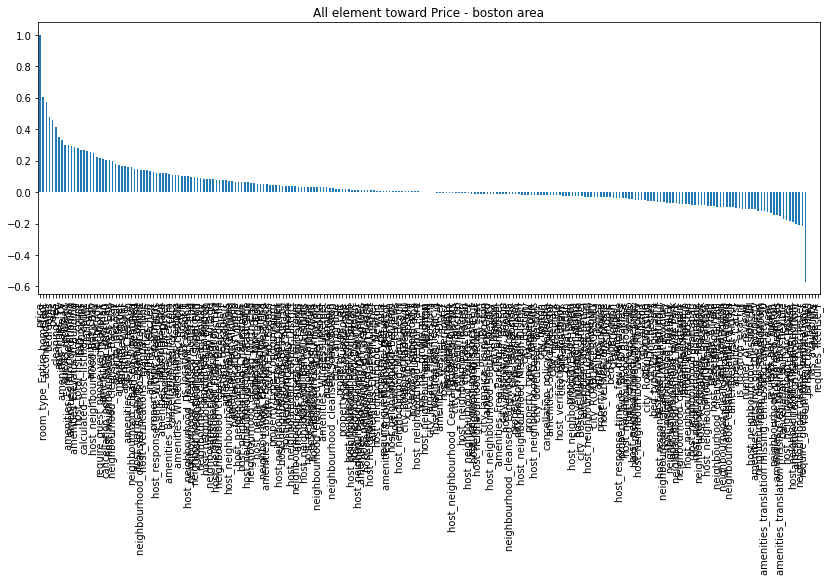

In [21]:
boston_corrs = boston_dummy.corr()
seattle_corrs = seattle_dummy.corr()

plt.figure(figsize=(14,5))
boston_corrs['price'].sort_values(ascending=False).plot(kind = 'bar')
plt.title('All element toward Price - boston area')

Text(0.5, 1.0, 'All element toward Price - seattle area')

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 

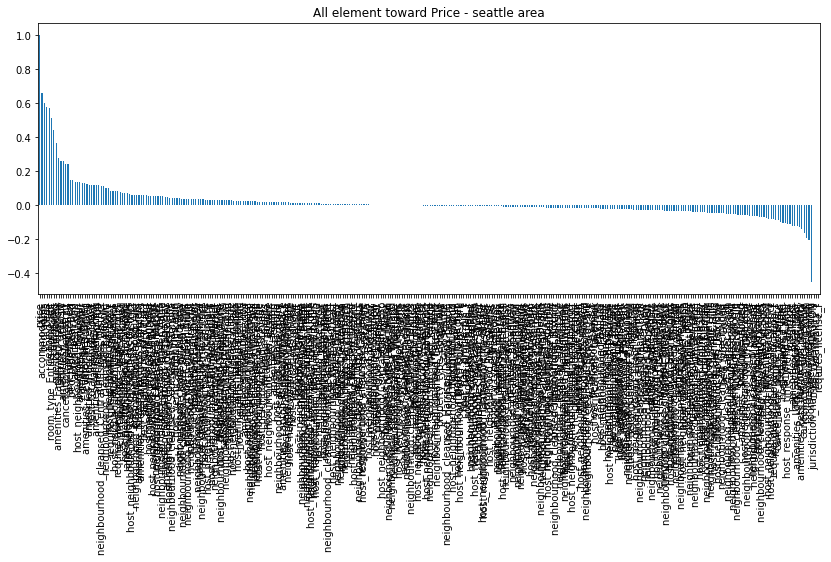

In [22]:
plt.figure(figsize=(14,5))
seattle_corrs['price'].sort_values(ascending=False).plot(kind = 'bar')
plt.title('All element toward Price - seattle area')

those 2 graph are very massy we will take a clear look at the top and bottom 10 below

Text(0.5, 1.0, 'bottom 10 seattle')

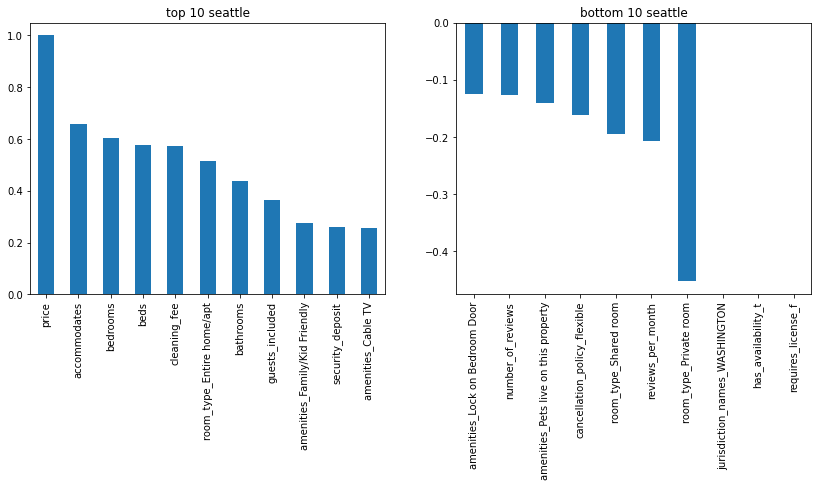

In [23]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
seattle_corrs['price'].sort_values(ascending=False)[:11].plot(kind = 'bar')
plt.title('top 10 seattle')

plt.subplot(1,2,2)
seattle_corrs['price'].sort_values(ascending=False)[-10:].plot(kind = 'bar')
plt.title('bottom 10 seattle')


Text(0.5, 1.0, 'bottom 10 boston')

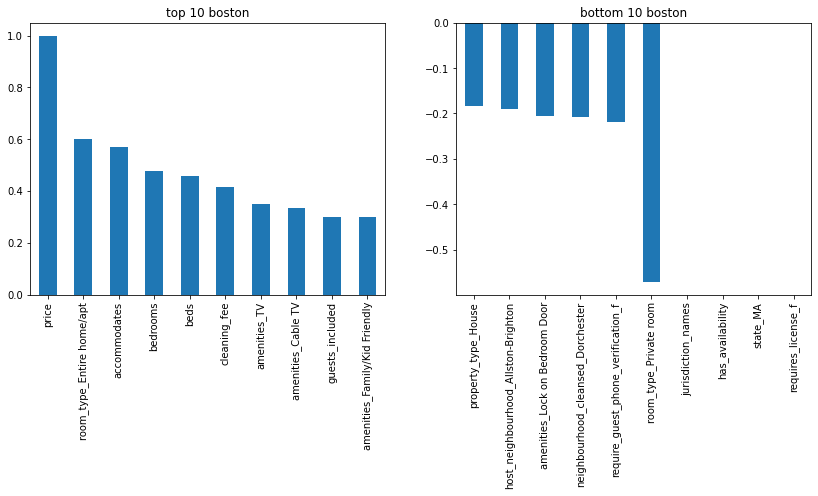

In [24]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
boston_corrs['price'].sort_values(ascending=False)[:10].plot(kind = 'bar')
plt.title('top 10 boston')

plt.subplot(1,2,2)
boston_corrs['price'].sort_values(ascending=False)[-10:].plot(kind = 'bar')
plt.title('bottom 10 boston')



The Top 5 elements relate to higher price are exactly the same for boston and seattle just in different orders. Those 5 element are: room_type_entire,accommodates,bedrooms,beds and cleaning_fee.

on the hand wether the listing place is a private room or not will effect the price in the downside the most

#### 4.2.1 Positve impact

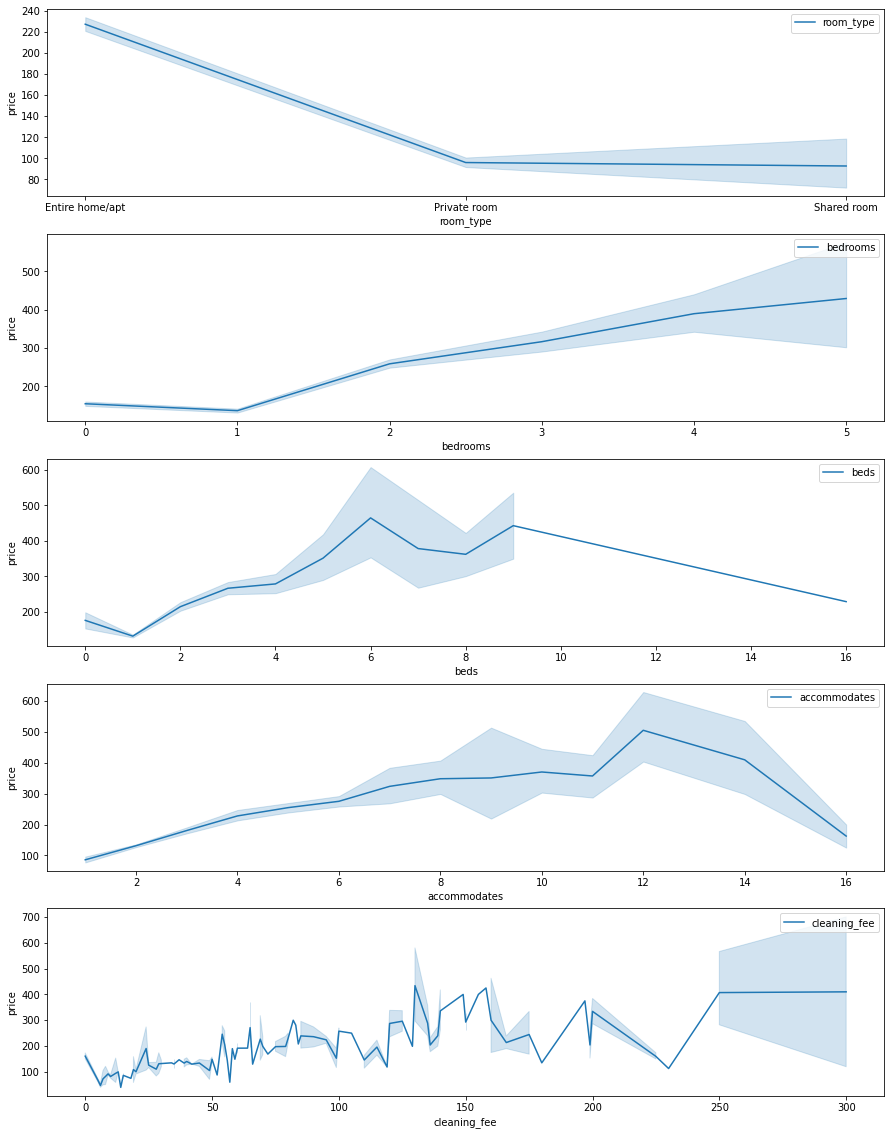

In [25]:
plt.figure(figsize=(15,20))

top_elements = ['room_type','bedrooms','beds','accommodates','cleaning_fee','price']
def line_plot(df):
    plot_df = df[top_elements]
    for number,col in enumerate(top_elements):
        if col != 'price':
            plt.subplot(5,1,number+1)
            sns.lineplot(data = plot_df,
                         x = col,
                         y = 'price',
                         label = col)
            
line_plot(boston)

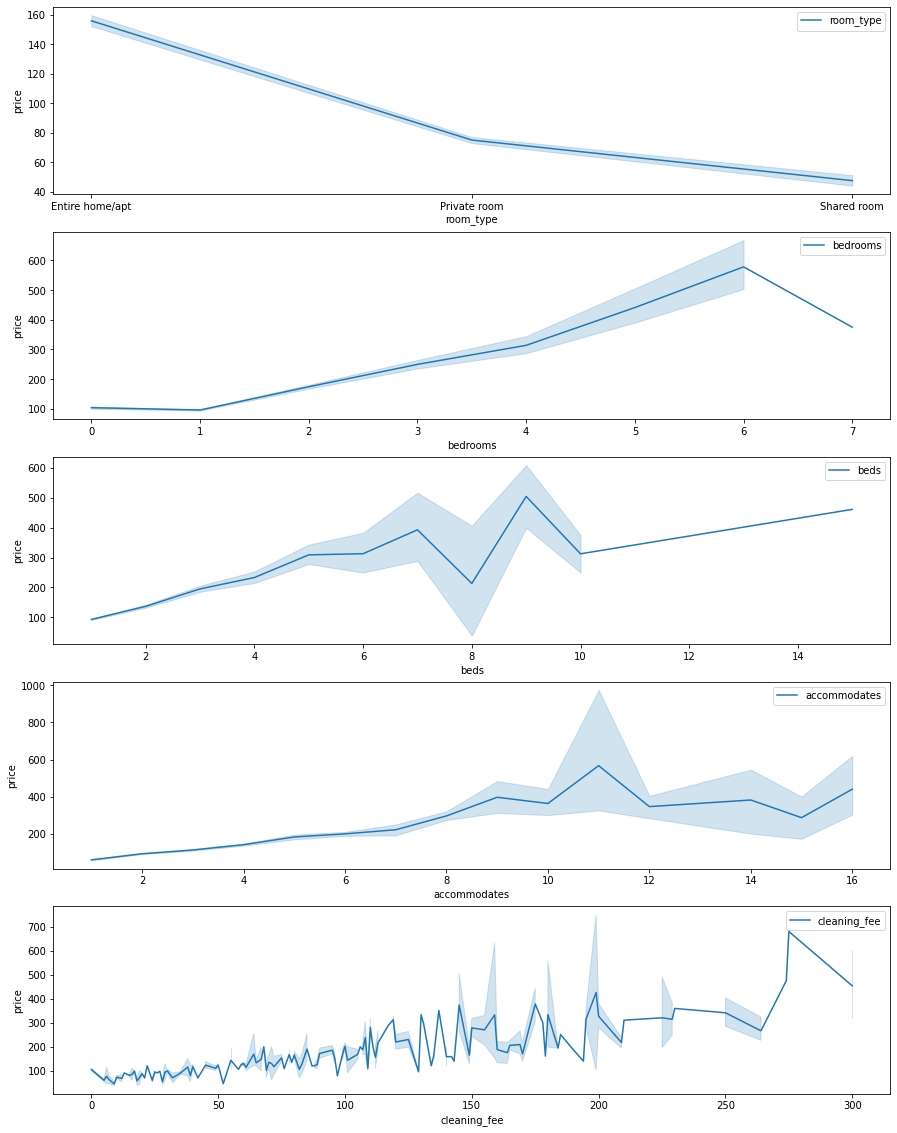

In [26]:
plt.figure(figsize=(15,20))

line_plot(seattle)

### Part 3 Find the correlation between price and customer_satification

- 1. find the correlation between price and customer_satification
- 2. find out elements that contribute the most toward happer customer_satification
- 3. are there any common elements contribute to both price and customer_satification


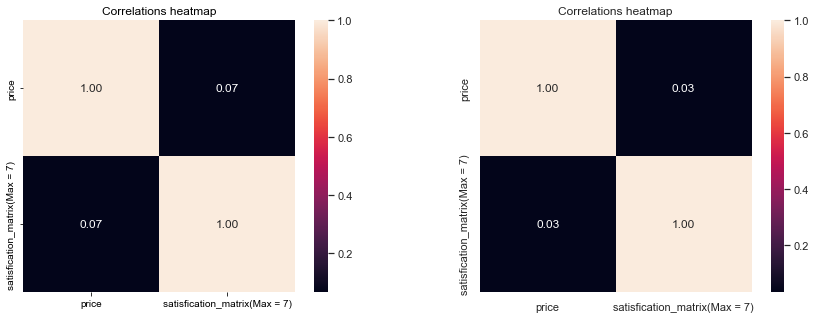

In [27]:
def correlation_matrix(df):
    cols = ['price','satisfication_matrix(Max = 7)']
    corrs = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
                  yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

plt.figure(figsize=(15,5))
    
plt.subplot(1,2,1)    
correlation_matrix(boston)
plt.subplot(1,2,2)
correlation_matrix(seattle)

Text(0.5, 1.0, 'top 10 seattle')

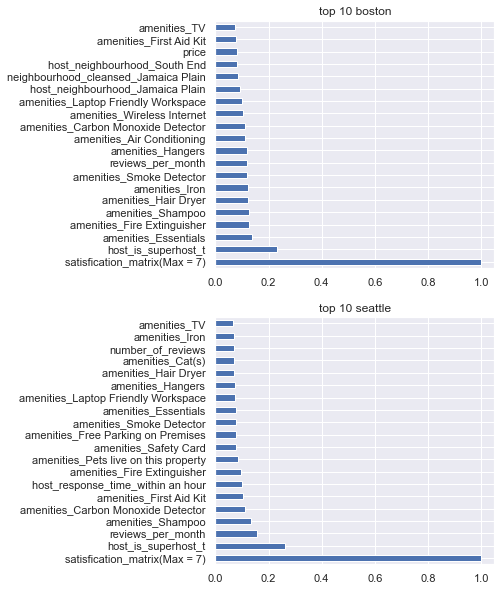

In [28]:
boston_corrs = boston_dummy.corr()
seattle_corrs = seattle_dummy.corr()

plt.figure(figsize=(5,10))

plt.subplot(2,1,1)
boston_corrs['satisfication_matrix(Max = 7)'].sort_values(ascending=False)[:20].plot(kind = 'barh')
plt.title('top 10 boston')

plt.subplot(2,1,2)
seattle_corrs['satisfication_matrix(Max = 7)'].sort_values(ascending=False)[:20].plot(kind = 'barh')
plt.title('top 10 seattle')

# 5. Conclusion

For a quick conclusion, as we dig into data we find that the the top importance elements contribute to a higher price tag are : 'room_type','bedrooms','beds','accommodates' and 'cleaning_fee'. This is easy to understand, bigger long more beds higher the price and more cleaning_fee. Beside this we also find that the customer satisfaction actually do not relate to higer price.

As a suggest for new host: if your want to sale for place for higher price tag, then try well manage your place and make full use of the space(for example: try managing and make the place bigger to fill more room or bed, but at the same time make less sacrifice on the experience), because this is the quick way to rise your property's price tag.